In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df=pd.read_csv("insurance.csv")

In [3]:
df.shape

(1338, 7)

In [4]:

df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [9]:
a=["sex","smoker","region"]
b=['age','bmi','children','charges']

male      676
female    662
Name: sex, dtype: int64


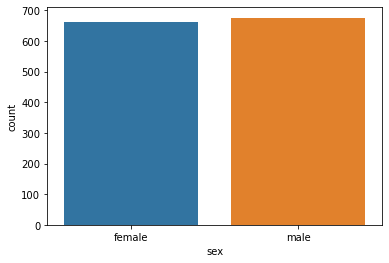

no     1064
yes     274
Name: smoker, dtype: int64


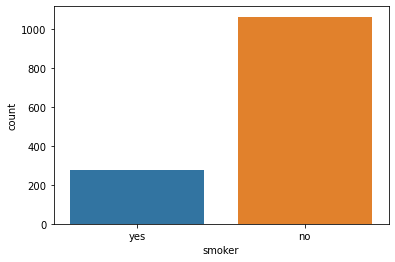

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


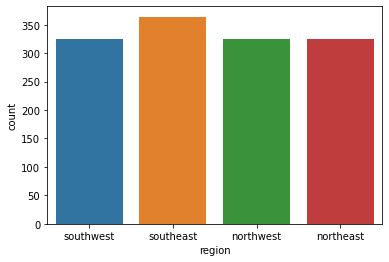

In [10]:
for i in a:
    print(df[i].value_counts())
    sns.countplot(x=i,data=df)
    plt.show()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64
0.05567251565299186


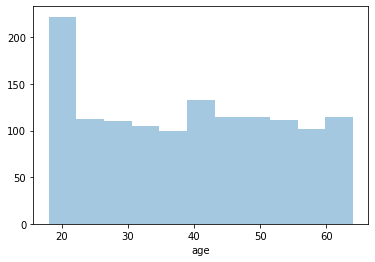

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64
0.2840471105987448


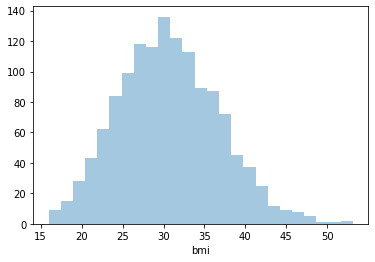

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64
0.9383804401702414


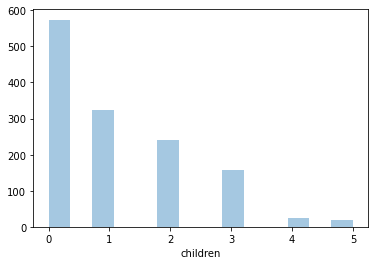

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64
1.5158796580240388


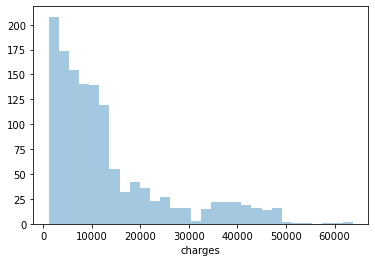

In [11]:
for i in b:
    sns.distplot(df[i],kde=False)
    print(df[i].describe())
    print(df[i].skew())
    plt.show()

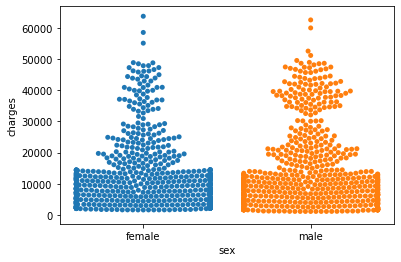

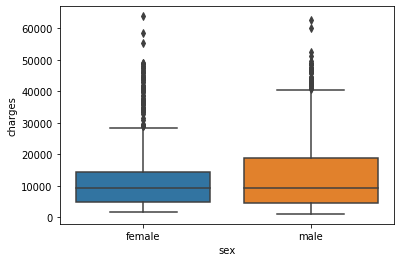

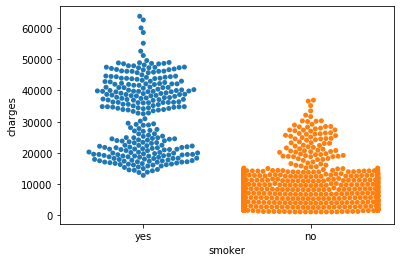

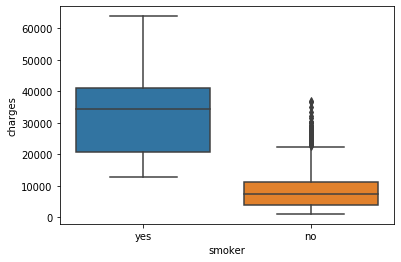

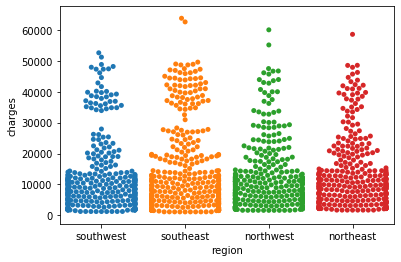

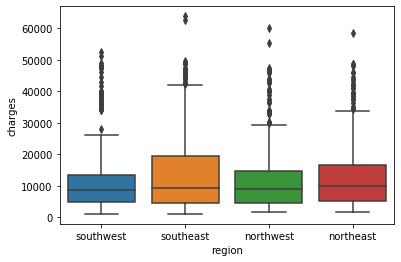

In [14]:
#bivariate Analysis
for i in a:
    sns.swarmplot(x=i,y="charges",data=df)
    plt.show()
    sns.boxplot(x=i,y="charges",data=df)
    plt.show()

              age   charges
age      1.000000  0.299008
charges  0.299008  1.000000


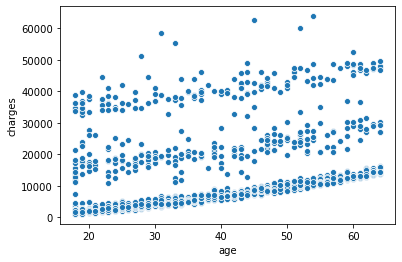

              bmi   charges
bmi      1.000000  0.198341
charges  0.198341  1.000000


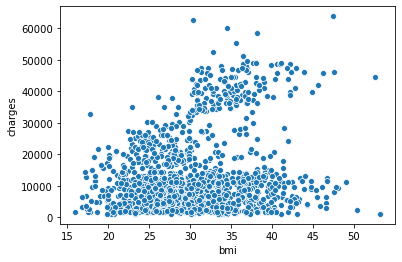

          children   charges
children  1.000000  0.067998
charges   0.067998  1.000000


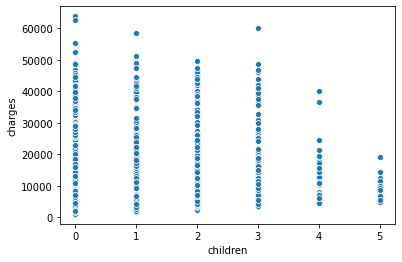

         charges  charges
charges      1.0      1.0
charges      1.0      1.0


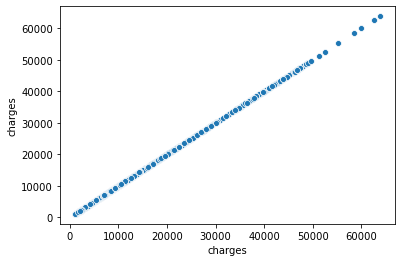

In [12]:
for i in b:
    sns.scatterplot(x=i,y="charges",data=df)
    print(df[[i,"charges"]].corr())
    plt.show()

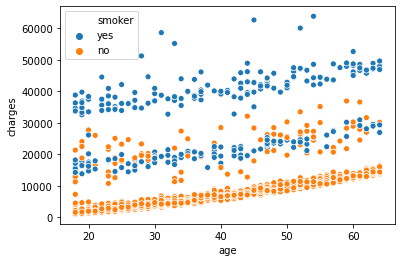

In [13]:
sns.scatterplot(x="age",y="charges",hue="smoker",data=df)
plt.show()

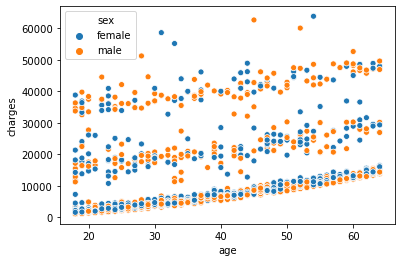

In [14]:
sns.scatterplot(x="age",y="charges",hue="sex",data=df)
plt.show()

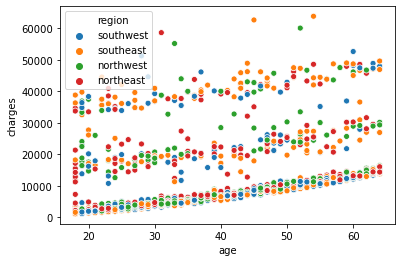

In [15]:
sns.scatterplot(x="age",y="charges",hue="region",data=df)
plt.show()

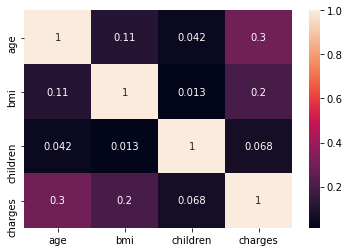

In [16]:
sns.heatmap(df.corr(),annot=True)
plt.show()

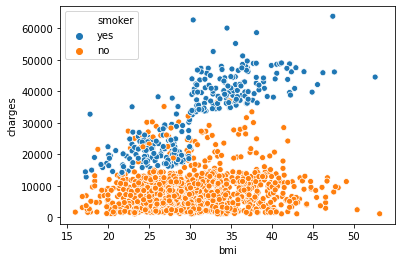

In [17]:
sns.scatterplot(x="bmi",y="charges",hue="smoker",data=df)
plt.show()

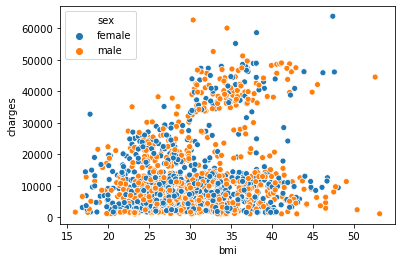

In [18]:
sns.scatterplot(x="bmi",y="charges",hue="sex",data=df)
plt.show()

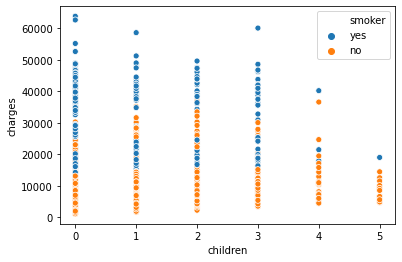

In [19]:
sns.scatterplot(x="children",y="charges",hue="smoker",data=df)
plt.show()

In [20]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [21]:
from sklearn.preprocessing import LabelEncoder
L1=LabelEncoder()
L2=LabelEncoder()
L3=LabelEncoder()
df["sex"]=L1.fit_transform(df['sex'])
df["smoker"]=L2.fit_transform(df['smoker'])
df["region"]=L3.fit_transform(df['region'])

In [22]:
print(L1.classes_)
print(L2.classes_)
print(L3.classes_)

['female' 'male']
['no' 'yes']
['northeast' 'northwest' 'southeast' 'southwest']


In [23]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [24]:
x=df.drop('charges',axis=1)
y=df['charges']
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [25]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(1070, 6)
(1070,)
(268, 6)
(268,)


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

In [27]:
algo=MLPRegressor(hidden_layer_sizes=(50,50),max_iter=2000,verbose=True)
algo.fit(xtrain,ytrain)

Iteration 1, loss = 161893543.32374054
Iteration 2, loss = 161752955.39304700
Iteration 3, loss = 161618015.11146253
Iteration 4, loss = 161480762.49732673
Iteration 5, loss = 161327619.99871296
Iteration 6, loss = 161168004.76172107
Iteration 7, loss = 160995187.57602960
Iteration 8, loss = 160806038.82833150
Iteration 9, loss = 160592246.18202773
Iteration 10, loss = 160351191.63420945
Iteration 11, loss = 160075623.08575988
Iteration 12, loss = 159758364.33697960
Iteration 13, loss = 159395741.76310524
Iteration 14, loss = 158973168.65788311
Iteration 15, loss = 158505185.85076919
Iteration 16, loss = 157946477.09733227
Iteration 17, loss = 157327352.28234133
Iteration 18, loss = 156622018.53703907
Iteration 19, loss = 155822605.67647645
Iteration 20, loss = 154940848.07861727
Iteration 21, loss = 153912717.23662347
Iteration 22, loss = 152818312.50511292
Iteration 23, loss = 151586425.69005951
Iteration 24, loss = 150260696.62561539
Iteration 25, loss = 148809172.49695033
Iteration

Iteration 216, loss = 63141298.86111093
Iteration 217, loss = 63131509.97496564
Iteration 218, loss = 63111764.88962291
Iteration 219, loss = 63098784.46383887
Iteration 220, loss = 63089137.16001575
Iteration 221, loss = 63074862.63714576
Iteration 222, loss = 63058624.97756159
Iteration 223, loss = 63049474.25584894
Iteration 224, loss = 63026125.49649549
Iteration 225, loss = 63006326.87495702
Iteration 226, loss = 62992280.96063513
Iteration 227, loss = 62973904.13036584
Iteration 228, loss = 62962044.57795651
Iteration 229, loss = 62941663.08723481
Iteration 230, loss = 62927688.59383117
Iteration 231, loss = 62913821.09427335
Iteration 232, loss = 62899403.47918148
Iteration 233, loss = 62887015.38249236
Iteration 234, loss = 62873630.18100991
Iteration 235, loss = 62850714.31748931
Iteration 236, loss = 62830569.53686981
Iteration 237, loss = 62816129.22103874
Iteration 238, loss = 62812772.93574340
Iteration 239, loss = 62785307.75978737
Iteration 240, loss = 62765168.55438778


Iteration 428, loss = 58018569.56025409
Iteration 429, loss = 57985574.14376502
Iteration 430, loss = 57927191.64748430
Iteration 431, loss = 57886366.82482088
Iteration 432, loss = 57847020.12780713
Iteration 433, loss = 57810193.13967738
Iteration 434, loss = 57759751.96937203
Iteration 435, loss = 57715696.93269075
Iteration 436, loss = 57677526.45615865
Iteration 437, loss = 57624375.74894068
Iteration 438, loss = 57595656.59319882
Iteration 439, loss = 57566214.41443006
Iteration 440, loss = 57513124.45992830
Iteration 441, loss = 57453989.77779858
Iteration 442, loss = 57402001.27541861
Iteration 443, loss = 57365865.52669980
Iteration 444, loss = 57324554.60556224
Iteration 445, loss = 57282745.31795201
Iteration 446, loss = 57246579.52398204
Iteration 447, loss = 57181606.40134143
Iteration 448, loss = 57130992.62228257
Iteration 449, loss = 57091022.21296404
Iteration 450, loss = 57036251.17751619
Iteration 451, loss = 56981730.27548802
Iteration 452, loss = 56940214.23621722


Iteration 649, loss = 37842401.30555314
Iteration 650, loss = 37704172.66961683
Iteration 651, loss = 37526872.45341063
Iteration 652, loss = 37380961.60978648
Iteration 653, loss = 37238583.29541901
Iteration 654, loss = 37098426.91556448
Iteration 655, loss = 36941337.96109714
Iteration 656, loss = 36809372.83253738
Iteration 657, loss = 36664315.05376014
Iteration 658, loss = 36548944.26285211
Iteration 659, loss = 36375379.52704188
Iteration 660, loss = 36196550.30744161
Iteration 661, loss = 36057970.19110864
Iteration 662, loss = 35906222.27766895
Iteration 663, loss = 35763899.61116434
Iteration 664, loss = 35620897.23983213
Iteration 665, loss = 35481759.36723633
Iteration 666, loss = 35316601.82245320
Iteration 667, loss = 35164975.52173311
Iteration 668, loss = 35024201.80473253
Iteration 669, loss = 34876874.92790698
Iteration 670, loss = 34745717.14294189
Iteration 671, loss = 34587898.93636569
Iteration 672, loss = 34426245.00762880
Iteration 673, loss = 34343064.02995369


Iteration 857, loss = 18116786.72387720
Iteration 858, loss = 18098023.53712372
Iteration 859, loss = 18089820.66607196
Iteration 860, loss = 18084198.42661269
Iteration 861, loss = 18082568.70694912
Iteration 862, loss = 18067695.56874179
Iteration 863, loss = 18045771.12571592
Iteration 864, loss = 18012182.02443707
Iteration 865, loss = 17986402.90811444
Iteration 866, loss = 17993592.71236948
Iteration 867, loss = 17961217.39000263
Iteration 868, loss = 17960836.25998668
Iteration 869, loss = 17952424.74493275
Iteration 870, loss = 17971868.43443407
Iteration 871, loss = 17927155.62850855
Iteration 872, loss = 17900646.69523960
Iteration 873, loss = 17915882.62470422
Iteration 874, loss = 17860830.36989059
Iteration 875, loss = 17903823.65232141
Iteration 876, loss = 17834017.76086529
Iteration 877, loss = 17895222.11074741
Iteration 878, loss = 17844017.21386756
Iteration 879, loss = 17811764.71041011
Iteration 880, loss = 17801969.29709501
Iteration 881, loss = 17784240.46628181


Iteration 1068, loss = 16929316.14818432
Iteration 1069, loss = 16927174.28809785
Iteration 1070, loss = 16916771.44585989
Iteration 1071, loss = 16915246.10054137
Iteration 1072, loss = 16909361.44442901
Iteration 1073, loss = 16902979.00243283
Iteration 1074, loss = 16915806.36894352
Iteration 1075, loss = 16906632.63352405
Iteration 1076, loss = 16909417.80895878
Iteration 1077, loss = 16898040.13292408
Iteration 1078, loss = 16902989.86050027
Iteration 1079, loss = 16912875.38021688
Iteration 1080, loss = 16886568.94400259
Iteration 1081, loss = 16889996.19905241
Iteration 1082, loss = 16911993.78918289
Iteration 1083, loss = 16861470.33019684
Iteration 1084, loss = 16901954.28889869
Iteration 1085, loss = 16878689.83747721
Iteration 1086, loss = 16931583.99199429
Iteration 1087, loss = 16916701.70873186
Iteration 1088, loss = 16898416.96067788
Iteration 1089, loss = 16871122.45305043
Iteration 1090, loss = 16865536.16390828
Iteration 1091, loss = 16866014.05258892
Iteration 1092, 

Iteration 1272, loss = 16490418.37594983
Iteration 1273, loss = 16544596.10621273
Iteration 1274, loss = 16510283.03511260
Iteration 1275, loss = 16532773.03448420
Iteration 1276, loss = 16520436.63440520
Iteration 1277, loss = 16522533.24836637
Iteration 1278, loss = 16534167.58243929
Iteration 1279, loss = 16517606.03777960
Iteration 1280, loss = 16500526.45291034
Iteration 1281, loss = 16510227.73888020
Iteration 1282, loss = 16477594.53209655
Iteration 1283, loss = 16545511.01563227
Iteration 1284, loss = 16470647.02107852
Iteration 1285, loss = 16547004.63055533
Iteration 1286, loss = 16464839.99664374
Iteration 1287, loss = 16509637.72514519
Iteration 1288, loss = 16493520.17002109
Iteration 1289, loss = 16494682.11071881
Iteration 1290, loss = 16482762.43754130
Iteration 1291, loss = 16466205.30715615
Iteration 1292, loss = 16477179.84985676
Iteration 1293, loss = 16469515.48186325
Iteration 1294, loss = 16463780.88228127
Iteration 1295, loss = 16458989.55896149
Iteration 1296, 

Iteration 1482, loss = 16152668.69371581
Iteration 1483, loss = 16141252.17864117
Iteration 1484, loss = 16138873.66348763
Iteration 1485, loss = 16155136.52682167
Iteration 1486, loss = 16148718.83324152
Iteration 1487, loss = 16152581.59800445
Iteration 1488, loss = 16140096.33589194
Iteration 1489, loss = 16140648.84338134
Iteration 1490, loss = 16132577.36702180
Iteration 1491, loss = 16137265.37071473
Iteration 1492, loss = 16153817.18133534
Iteration 1493, loss = 16134929.01953673
Iteration 1494, loss = 16171040.99308962
Iteration 1495, loss = 16157343.69332423
Iteration 1496, loss = 16138767.44463101
Iteration 1497, loss = 16138431.99189006
Iteration 1498, loss = 16162228.84198290
Iteration 1499, loss = 16134725.17362897
Iteration 1500, loss = 16115605.10948314
Iteration 1501, loss = 16120986.72346832
Iteration 1502, loss = 16124078.75623078
Iteration 1503, loss = 16173750.56675497
Iteration 1504, loss = 16123084.33106208
Iteration 1505, loss = 16154558.73011245
Iteration 1506, 

Iteration 1691, loss = 15789037.67076505
Iteration 1692, loss = 15776997.94657907
Iteration 1693, loss = 15778897.40071206
Iteration 1694, loss = 15804467.99646271
Iteration 1695, loss = 15771318.12161077
Iteration 1696, loss = 15756470.34209402
Iteration 1697, loss = 15768856.42827060
Iteration 1698, loss = 15769715.58744620
Iteration 1699, loss = 15785384.25388565
Iteration 1700, loss = 15763372.42783374
Iteration 1701, loss = 15769515.44028470
Iteration 1702, loss = 15744446.35129875
Iteration 1703, loss = 15764850.33418176
Iteration 1704, loss = 15757897.67771757
Iteration 1705, loss = 15750419.73507800
Iteration 1706, loss = 15734964.76516556
Iteration 1707, loss = 15741350.01472677
Iteration 1708, loss = 15737481.54698690
Iteration 1709, loss = 15758375.30815920
Iteration 1710, loss = 15719153.06965743
Iteration 1711, loss = 15771774.42280501
Iteration 1712, loss = 15684969.83307596
Iteration 1713, loss = 15807911.72070085
Iteration 1714, loss = 15734121.27668077
Iteration 1715, 

MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=2000, verbose=True)

In [28]:
ypred=algo.predict(xtest)

In [29]:
from sklearn.metrics import mean_absolute_error,r2_score
print(mean_absolute_error(ytest,ypred))
print(r2_score(ytest,ypred))

4008.614375651338
0.7297349898709751


In [30]:
algo2=LinearRegression()
algo2.fit(xtrain,ytrain)


LinearRegression()

In [31]:
ypred=algo2.predict(xtest)

In [32]:
print(mean_absolute_error(ytest,ypred))
print(r2_score(ytest,ypred))

4508.287880031006
0.696564234533822


In [33]:
algo3=DecisionTreeRegressor()
algo3.fit(xtrain,ytrain)


DecisionTreeRegressor()

In [34]:
ypred=algo3.predict(xtest)
print(mean_absolute_error(ytest,ypred))
print(r2_score(ytest,ypred))



3352.821331899254
0.669475423458944


In [42]:
import joblib
joblib.dump(algo,"ann-model.pkl")


['ann-model.pkl']

In [43]:
new=np.array([[25,0,38.23,3,1,1]])
algo.predict(new)

array([35365.23688179])

In [44]:
joblib.dump(L1,"ann-model-l1.pkl")
joblib.dump(L2,"ann-model-l2.pkl")
joblib.dump(L3,"ann-model-l3.pkl")

['ann-model-l3.pkl']